In [25]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from copy import copy as copy
from pprint import pprint as pprint

## Cargando las canciones y Extrayendo sus frecuencias

In [26]:
pyramid = pd.read_csv("./data/pyramid_song-parcial.csv")
display("starts at: ", pyramid.iloc[ : , 0].max()/44100 , "seg")
display((pyramid.iloc[ : , 0].max() - pyramid.iloc[ : , 0].min()) / 44100, "seg")

'starts at: '

86.2249433106576

'seg'

28.741632653061224

'seg'

In [27]:
kekalor = pd.read_csv("./data/keka_kalor-parcial.csv")
display("starts at: ", kekalor.iloc[ : , 0].max()/44100 , "seg")
display((kekalor.iloc[ : , 0].max() - kekalor.iloc[ : , 0].min()) / 44100, "seg")

'starts at: '

45.72467120181406

'seg'

15.241541950113378

'seg'

# Trabajando solo con el canal derecho

## Pyramid Song

In [28]:
pyramid = pyramid.rigth

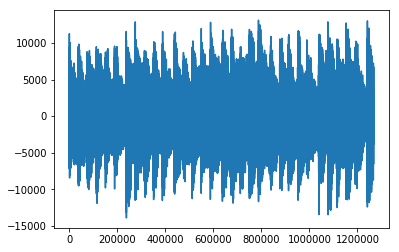

In [29]:
plt.plot(pyramid)

## Que Calor 

In [30]:
kekalor = kekalor.rigth

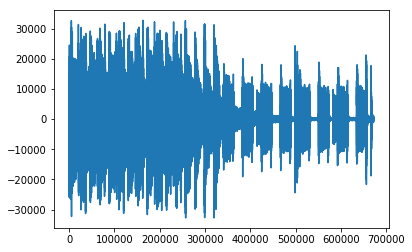

In [31]:
plt.plot(kekalor)

### Es continuo? 

NO

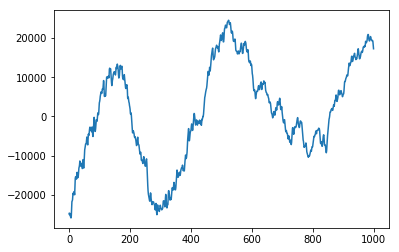

In [32]:
plt.plot(kekalor[0:int(1e3)])

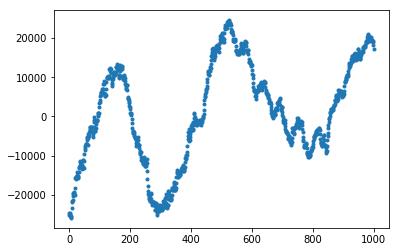

In [33]:
plt.plot(kekalor[0:int(1e3)], '.')

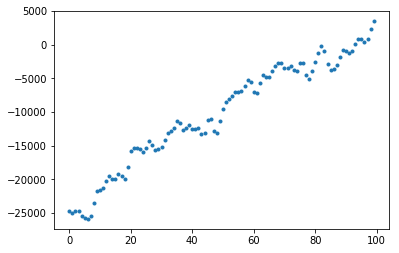

In [34]:
plt.plot(kekalor[0:int(1e2)], '.')

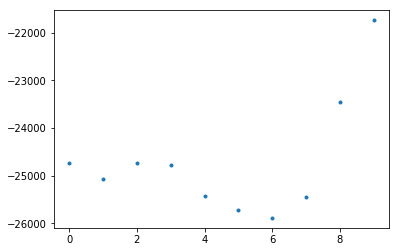

In [35]:
plt.plot(kekalor[0:int(1e1)], '.')

## FFT

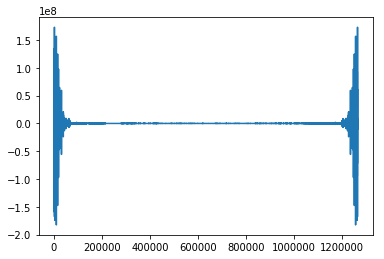

In [36]:
plt.plot(np.fft.fft(pyramid).real)

In [37]:
pyramid_freqs = np.fft.fft(pyramid).real

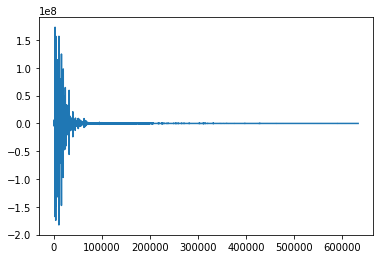

In [38]:
plt.plot(pyramid_freqs[0:pyramid_freqs.shape[0]//2])
pyramid_freqs = pyramid_freqs[0:pyramid_freqs.shape[0]//2]

In [39]:
pyramid_freqs = pyramid_freqs[0:pyramid_freqs.shape[0]//8]

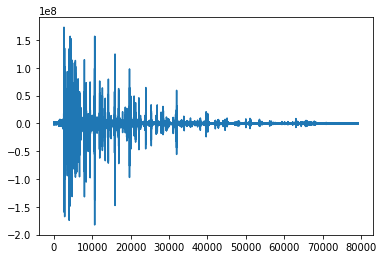

In [40]:
plt.plot(pyramid_freqs)

In [41]:
temp = np.diff(pyramid_freqs)
for _ in range(int(1e2)):
    temp = np.diff(temp)

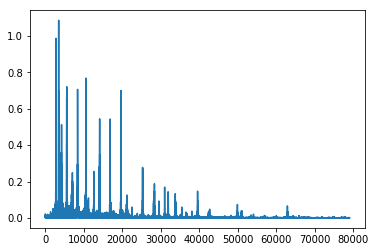

In [42]:
temp = np.abs(temp) / 1e38
plt.plot(temp)

In [43]:
temp = (temp > 0.4) * temp

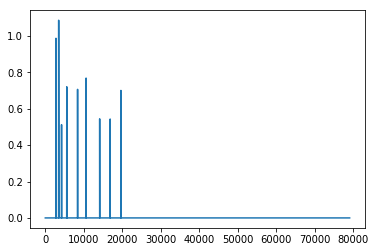

In [44]:
plt.plot(temp)

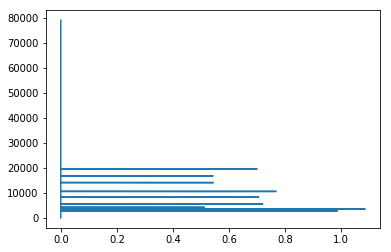

In [45]:
plt.plot(temp, np.arange(temp.size))

In [113]:
x = np.matrix([temp, np.arange(temp.size)]).T[:int(2.5*1e4)]

In [114]:
x = pd.DataFrame(x)
x = x.sort_values(by=x.columns[0])

In [115]:
alt_temp = np.abs(x.diff() + 1)

In [116]:
alt_temp = alt_temp[alt_temp[1] > 1e4]
alt_temp[0] = (alt_temp[0] * 1000) - 1000

In [117]:
alt_temp[alt_temp[0] > 2]

,0,1
3524,3.958466,13334.0
16867,2.659944,12645.0
4226,2.844763,12639.0
3461,2.335255,10670.0
5586,3.485106,14062.0
19655,3.274185,14095.0
19650,3.086870,14086.0
5585,7.454016,14064.0
19651,8.316154,14072.0
5584,9.393667,14066.0


In [118]:
o_freq = alt_temp[alt_temp[0] > 2].index

In [119]:
x = np.arange(pyramid.shape[0], dtype=float)
for ii in o_freq:
    x += np.sin(2 * np.pi * ii * x)

In [120]:
x = (x * (x > x.max()/2)) - (x * (x <= (x.max()/2)))

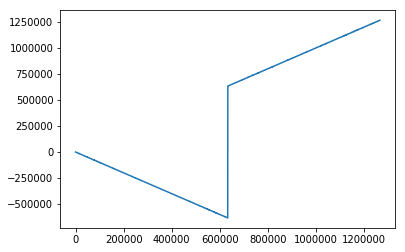

In [121]:
plt.plot(x)